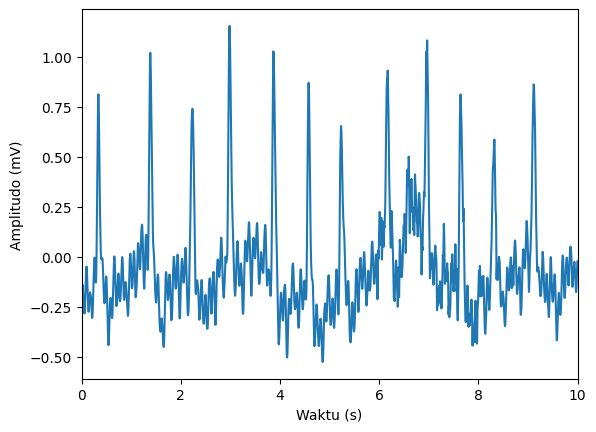

In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



#memasukkan data
df = pd.read_excel('SuddecCardiacDeathv3.xlsx', header=[0,1])
t = df[df.columns[0]]
s1 = df[df.columns[1]]
fs = 1/0.004
N = len(df.index)

plt.plot(t*0.004,s1)
plt.xlim(0,10)
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo (mV)')
plt.Figure=(13,9)


In [4]:
X_real1 = np.zeros(N)
X_imaj1 = np.zeros(N)
MagDFT1 = np.zeros(N)
X_real2 = np.zeros(N)
X_imaj2 = np.zeros(N)
MagDFT2 = np.zeros(N)

for k in range(N):
    for n in range(N):
        X_real1[k] += s1[n]*np.cos(2*np.pi*k*n/N)
        X_imaj1[k] -= s1[n]*np.sin(2*np.pi*k*n/N)
    
for k in range(N):
    MagDFT1[k] = np.sqrt(np.square(X_real1[k]) + np.square(X_imaj1[k])) 
    
n = np.arange(0,N,1,dtype=int)
k = np.arange(0,N,1,dtype=int)



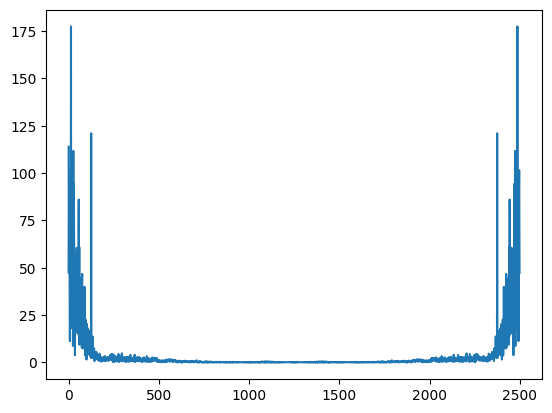

In [5]:
plt.plot(MagDFT1)

FFT :


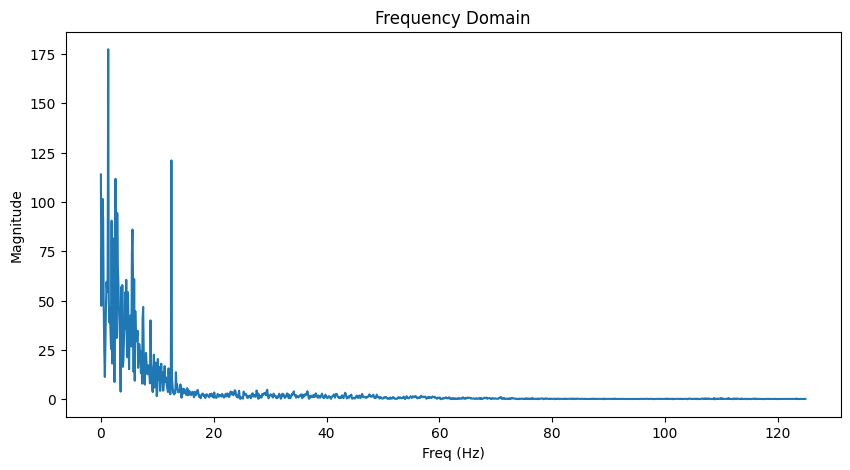

In [7]:
#FFT 
real_odd = np.zeros(round(N/2))
im_odd = np.zeros(round(N/2))
real_eve = np.zeros(round(N/2))
im_eve = np.zeros(round(N/2))

for k in range(round(N/2)):
    for n in range(round(N/2)):
        real_odd[k] += s1[2*n]*np.cos(2*np.pi*k*2*n/N)
        im_odd[k] -= s1[2*n]*np.sin(2*np.pi*k*2*n/N)
        real_eve[k] += s1[2*n+1]*np.cos(2*np.pi*k*(2*n+1)/N)
        im_eve[k] -= s1[2*n+1]*np.sin(2*np.pi*k*(2*n+1)/N)

X_real = real_odd + real_eve
X_imaj = im_eve + im_odd
MagDFT = np.zeros(round(N/2))

for k in range(round(N/2)):
    MagDFT[k] = np.sqrt(np.square(X_real[k]) + np.square(X_imaj[k])) 

n = np.arange(0,N/2,1,dtype=int)
k = np.arange(0,N/2,1,dtype=int)


print('FFT :')
plt.figure(figsize=((10,5)))
plt.plot(k*fs/N, MagDFT[k])
plt.xlabel("Freq (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Domain")
plt.show()


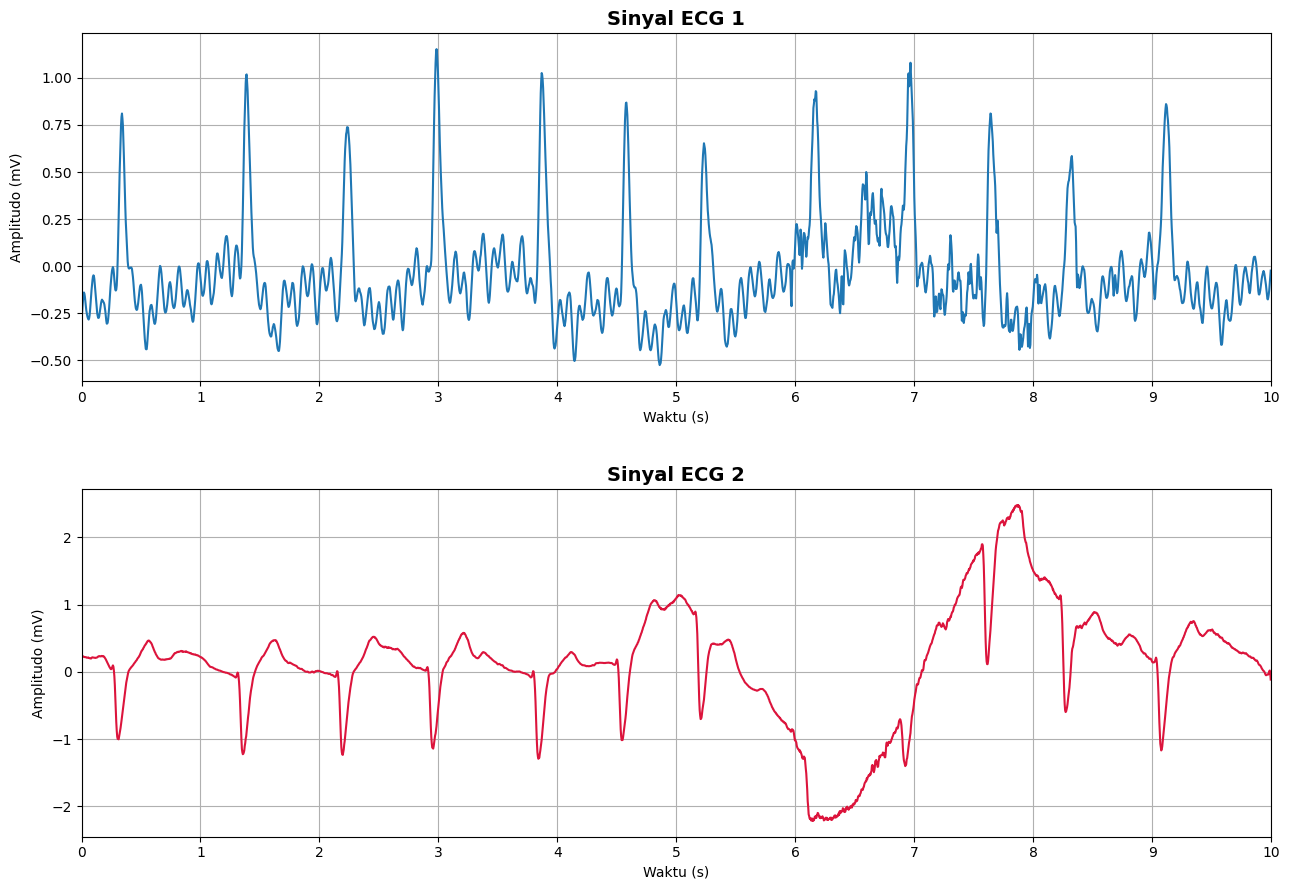

In [ ]:
y1 =np.zeros(N)
y2 =np.zeros(N)

for n in range(N):
    for k in range(N):
        y1[n]+=(X_real1[k]-(X_imaj1[k]))*((np.cos(2*np.pi*k*n/N))+(np.sin(2*np.pi*k*n/N)))/N
        y2[n]+=(X_real2[k]-(X_imaj2[k]))*((np.cos(2*np.pi*k*n/N))+(np.sin(2*np.pi*k*n/N)))/N

#looping
n = np.arange(0,N,1,dtype=int)
k = np.arange(0,N,1,dtype=int)  

fig, axs = plt.subplots(2, figsize=(13,9))
axs[0].plot(t*0.004,y1[n])
axs[0].set_title('Sinyal ECG 1',fontweight="bold", size=14)
axs[1].plot(t*0.004,y2[n],'crimson')
axs[1].set_title('Sinyal ECG 2',fontweight="bold", size=14)
for ax in axs.flat:
    ax.set(xlabel='Waktu (s)',ylabel='Amplitudo (mV)', xlim=(0,10), xticks=(np.arange(0,11)))
    ax.grid()
fig.tight_layout(h_pad=3)